In [1]:
# !pip install opencv-python matplotlib imageio gdown tensorflow

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

2025-06-18 13:57:04.524685: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750255024.974052      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750255025.089436      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
# tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [11]:
# physical_devices=tf.config.list_physical_devices('GPU')
# try:
#   tf.config.experimental.set_memory_growth(physical_devices[0],True)
# except:
#   pass

In [3]:
import gdown

In [4]:
url = '/kaggle/input/data-zip'
output = 'data.zip'
print(os.listdir('/kaggle/input/data-zip'))

['data']


In [5]:
def load_video(path:str) -> List[float]:

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [6]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [7]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


I0000 00:00:1750255073.119944      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1750255073.120662      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [8]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [9]:
def load_alignments(path:str) -> List[str]:
    with open(path, 'r') as f:
        lines = f.readlines()
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil':
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [10]:
def load_data(path: str):
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    base_data_path = '/kaggle/input/data-zip/data'
    video_path = os.path.join(base_data_path,'s1',f'{file_name}.mpg')
    alignment_path = os.path.join(base_data_path,'alignments','s1',f'{file_name}.align')
    frames = load_video(video_path)
    alignments = load_alignments(alignment_path)

    return frames, alignments

In [11]:
test_path='/kaggle/input/data-zip/data/s1/bbal6n.mpg'

In [12]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [13]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [14]:
frames

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.460374  ],
         [ 1.460374  ],
         [ 1.4209044 ],
         ...,
         [ 0.15787826],
         [ 0.19734783],
         [ 0.07893913]],

        [[ 1.460374  ],
         [ 1.460374  ],
         [ 1.4209044 ],
         ...,
         [ 0.15787826],
         [ 0.07893913],
         [ 0.03946957]],

        [[ 1.4209044 ],
         [ 1.4209044 ],
         [ 1.3814349 ],
         ...,
         [ 0.07893913],
         [ 0.07893913],
         [ 0.07893913]],

        ...,

        [[ 0.9472696 ],
         [ 0.9472696 ],
         [ 0.9472696 ],
         ...,
         [ 9.946331  ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.9472696 ],
         [ 0.9472696 ],
         [ 0.9472696 ],
         ...,
         [ 9.906861  ],
         [ 9.867392  ],
         [ 9.867392  ]],

        [[ 0.9472696 ],
         [ 0.9472696 ],
         [ 0.9472696 ],
         ...,
         [ 9.906861  ],
         [ 9.86739

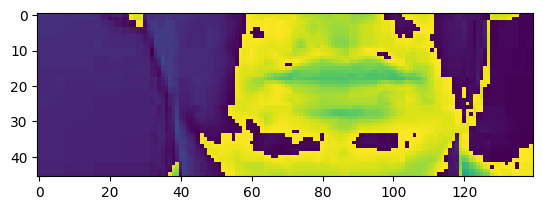

In [16]:
plt.imshow(frames[0])

In [17]:
print([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])


['b', 'i', 'n', ' ', 'b', 'l', 'u', 'e', ' ', 'a', 't', ' ', 'l', ' ', 's', 'i', 'x', ' ', 'n', 'o', 'w']


In [18]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])


<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [19]:

def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

DATA PIPELINE

In [20]:
data = tf.data.Dataset.list_files('/kaggle/input/data-zip/data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split
train = data.take(450)
test = data.skip(450)

In [21]:
frames, alignments = data.as_numpy_iterator().next()

In [22]:
len(frames)

2

In [23]:
sample = data.as_numpy_iterator()
val = sample.next(); val[0]

array([[[[[ 1.2170519 ],
          [ 1.2170519 ],
          [ 1.2170519 ],
          ...,
          [ 0.17386456],
          [ 0.13909164],
          [ 0.13909164]],

         [[ 1.2170519 ],
          [ 1.2170519 ],
          [ 1.2170519 ],
          ...,
          [ 0.17386456],
          [ 0.13909164],
          [ 0.13909164]],

         [[ 1.2518247 ],
          [ 1.2518247 ],
          [ 1.2170519 ],
          ...,
          [ 0.13909164],
          [ 0.10431873],
          [ 0.10431873]],

         ...,

         [[ 0.90409565],
          [ 0.90409565],
          [ 0.90409565],
          ...,
          [ 7.1632195 ],
          [ 7.9977694 ],
          [ 8.484591  ]],

         [[ 0.8693228 ],
          [ 0.8693228 ],
          [ 0.8693228 ],
          ...,
          [ 6.850263  ],
          [ 7.40663   ],
          [ 8.032542  ]],

         [[ 0.8693228 ],
          [ 0.8693228 ],
          [ 0.8693228 ],
          ...,
          [ 6.57208   ],
          [ 7.0936737 ],
          

In [24]:
sample = data.as_numpy_iterator()
val = sample.next()

# Select the first frame of the second video in the batch
frame_to_save = val[0][1]

# Scale the floating-point data to 0-255 and cast to uint8
# The frames are normalized to tf.float32. imageio/PIL expect uint8 for grayscale.
# We need to scale and cast the data.
# Assuming the normalized data has a reasonable range, we can scale it to 0-255.
# A simple way is to assume the normalized data is roughly between some range (e.g., -5 to 5)
# and map that to 0-255. A more accurate way would be to analyze the data's actual range.
# For now, let's apply a scaling that should work for normalized data.
# Assuming normalization results in data centered around 0, scaling by 127.5 and adding 127.5
# might not be sufficient if the range is large. Let's try clipping and scaling.

# Clip the normalized data to a reasonable range (e.g., between -3 and 3 standard deviations
# relative to the mean before normalization, but after normalization, the range is different).
# Let's assume a reasonable range for the normalized float32 data is roughly -5 to 5.
clipped_frame = np.clip(frame_to_save, -5, 5)

# Scale the clipped data from its range (e.g., -5 to 5) to 0-255
# Range of clipped_frame is 10 (-5 to 5). Scale factor is 255 / 10 = 25.5
# Shift by adding 5 to make the range 0 to 10, then multiply by 25.5
scaled_frame = (clipped_frame + 5) * 25.5

# Ensure the scaled values are within 0-255 and cast to uint8
scaled_frame_uint8 = np.clip(scaled_frame, 0, 255).astype(np.uint8)


# Remove the singleton channel dimension.
# imageio/PIL for grayscale expects shape (height, width), not (height, width, 1).
scaled_frame_squeezed = np.squeeze(scaled_frame_uint8, axis=-1)


# Save the animation using the scaled and converted frame data
imageio.mimsave('./animation.gif', scaled_frame_squeezed, fps=10)

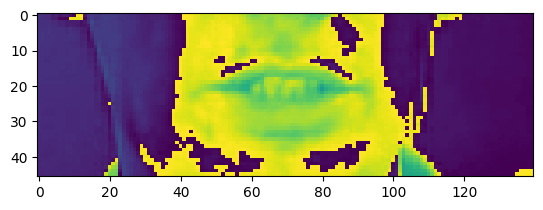

In [25]:
plt.imshow(val[0][0][35]) # 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video

In [26]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'lay red in k two now'>

Design the Deep Neural Network

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [29]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv3D, Activation, MaxPool3D, Reshape, Bidirectional, LSTM, Dropout, Dense

model = Sequential()
model.add(Input(shape=(75, 46, 140, 1)))  # Explicit Input layer
model.add(Conv3D(128, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Reshape((75, 5 * 17 * 75)))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                      │ (None, 75, 46, 140, 128)    │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 75, 46, 140, 128)    │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d (MaxPooling3D)         │ (None, 75, 23, 70, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_1 (Conv3D)                    │ (None, 75, 23, 70, 256)     │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 75, 23, 70, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_1 (MaxPooling3D)       │ (None, 75, 11, 35, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv3d_2 (Conv3D)                    │ (None, 75, 11, 35, 75)      │         518,475 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 75, 11, 35, 75)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling3d_2 (MaxPooling3D)       │ (None, 75, 5, 17, 75)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 75, 6375)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 75, 256)             │       6,660,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 75, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 75, 256)             │         394,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 75, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 75, 41)              │          10,537 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,471,924 (32.32 MB)

 Trainable params: 8,471,924 (32.32 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
yhat = model.predict(val[0])


I0000 00:00:1750255319.491083      99 cuda_dnn.cc:529] Loaded cuDNN version 90300


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


In [33]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])


<tf.Tensor: shape=(), dtype=string, numpy=b'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'>

In [34]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz'>

In [35]:
model.input_shape


(None, 75, 46, 140, 1)

In [36]:
model.output_shape


(None, 75, 41)

Setup Training Options and Train

In [37]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [38]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [39]:
class ProduceExample(tf.keras.callbacks.Callback):
    def __init__(self, dataset) -> None:
        self.dataset = dataset.as_numpy_iterator()

    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [40]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)


In [41]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint.weights.h5'), monitor='loss', save_weights_only=True)


In [42]:
schedule_callback = LearningRateScheduler(scheduler)


In [43]:
example_callback = ProduceExample(test)


In [44]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])

Epoch 1/100


I0000 00:00:1750255633.749141      98 service.cc:148] XLA service 0x3eec0290 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750255633.754106      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1750255633.754128      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1750255634.622045      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 46/450 ━━━━━━━━━━━━━━━━━━━━ 6:48 1s/step - loss: 142.3465

[mpeg1video @ 0x7d359003fd40] ac-tex damaged at 22 17
[mpeg1video @ 0x7d359003fd40] Warning MVs not available


450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - loss: 100.4841

[mpeg1video @ 0x7d33f78f3700] ac-tex damaged at 22 17
[mpeg1video @ 0x7d33f78f3700] Warning MVs not available


KeyboardInterrupt: 